# Описание
Требуется приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Часть 1. Приоритизация гипотез**.<br>
В файле * `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.<br><br>

**Задача**<br>
• Применить фреймворк `ICE` для приоритизации гипотез. Отсортировать по убыванию приоритета.<br>
• Применить фреймворк `RICE` для приоритизации гипотез. Отсортировать по убыванию приоритета.<br>
• Указать, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Почему так произошло.<br><br>


**Часть 2. Анализ A/B-теста**<br>
Проведен A/B-тест и получены результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.<br><br>


**Задача**<br>
Проанализировать A/B-тест:<br>
1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4. Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
5. Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
14. Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

# Описание данных 

*Данные для первой части*

Файл `/datasets/hypothesis.csv`

* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

*Данные для второй части*

Файл `/datasets/orders.csv`

* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.


Файл `/datasets/visitors.csv`

* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизация гипотез.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# открытие файла с гипотезами и знакомство с данными

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
display(hypothesis.head(10))
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
hypothesis.columns = map(str.lower, hypothesis.columns)

### Приоритизация гипотез фреймворком ICE.

In [4]:
# добавление столбца с результатом приоритизации ICE
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


<div class="alert alert-info">
<b>Комментарий:</b><br>
Представлена таблица по убыванию приоритета гипотез, сформированная при помощи фреймворка ICE.
</div>

### Приоритизация гипотез фреймворком RICE

In [5]:
# добавление столбца с результатом приоритизации RICE
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


<div class="alert alert-info">
<b>Комментарий:</b><br>
Представлена таблица по убыванию приоритета гипотез, сформированная при помощи фреймворка RICE.<br>
</div>

### Изменение приоритизации. Объяснение

В топ-5 приоритетных гипотез остались те же самые гипотезы: 0, 2, 6, 7, 8.<br>
На изменение приоритетности при применении `RICE` повлиял компонент `Reach`, показыващий охват пользователей.<br>
Следовательно приоритетность поменялась с учетом охвата.

## Анализ A/B-теста

In [6]:
# считывание файлов
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [7]:
display(orders.head(10))
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
# приведение столбца date к нужному типу
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
display(visitors.head(10))
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
# приведение столбца date к нужному типу
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

<div class="alert alert-info">
<b>Комментарий V2:</b><br>
Ознакомился с данными о заказах и посетителях. Данные приведены к нужному для дальнейшей работы типу<br>
</div>

In [11]:
# Проверка наличия пользователя в двух группах одновременно
a_list = []
a_b_list = []
for i in range(len(orders)):
    if orders['group'][i] == 'A':
        a_list.append(orders['visitorId'][i])
        
for z in range(len(orders)):
    if (orders['group'][z] == 'B') and (orders['visitorId'][z] in a_list):
        a_b_list.append(orders['visitorId'][z])
        
print('Число пользователей, находящихся одновременно в двух группах =', len(a_b_list))

Число пользователей, находящихся одновременно в двух группах = 92


In [12]:
#orders = orders.query('visitorId not in @a_b_list')

### Построение графика кумулятивной выручки по группам

In [13]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [14]:
# Вычислим максимальную дату. Для группы рассчитаем максимум. Найдём число уникальных ID заказов и пользователей. 
# Подсчитаем сумму средних чеков
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(
    by=['date','group'])

In [15]:
# Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [16]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


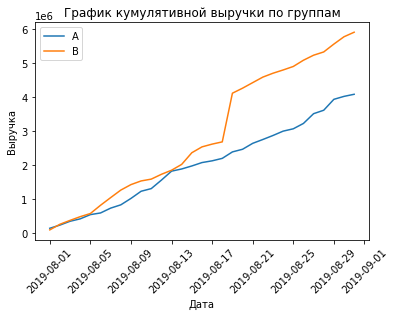

In [17]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.xticks(rotation = 45)

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation = 45)

plt.title("График кумулятивной выручки по группам")
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.legend()

<div class="alert alert-info">
<b>Комментарий:</b><br>
График группы B резко растет в одной точке.<br>
Возможно увеличение числа заказов или появление дорогих чеков.
</div>

### Построение графика кумулятивного среднего чека по группам

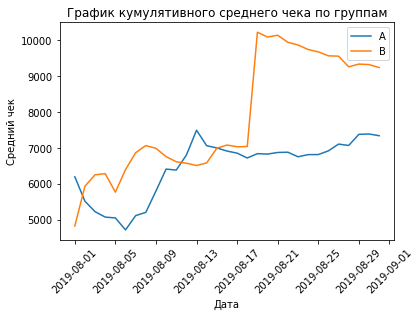

In [18]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation = 45)
plt.title("График кумулятивного среднего чека по группам")
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.legend()

<div class="alert alert-info">
<b>Комментарий:</b><br>
На протяжении времени группа A начинает выравниваться к середине теста. В начале имеет более низкий средний чек.<br>
У группы B есть несколько скачков среднего чека. К середине теста происходит сильный скачок. Возможно осуществление очень дорогой покупки.
</div>

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A.

Text(0.5, 0, 'Дата')

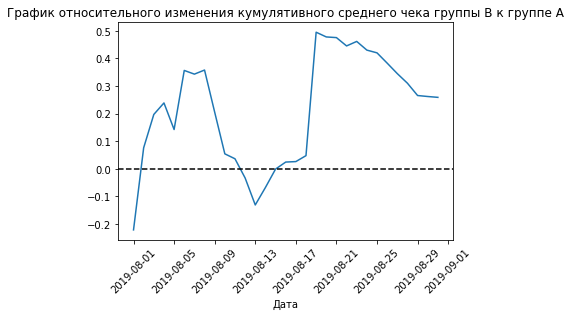

In [19]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation = 45)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title("График относительного изменения кумулятивного среднего чека группы В к группе А")
plt.xlabel("Дата")

<div class="alert alert-info">
<b>Комментарий:</b><br>
В нескольких точках график различия между сегментами резко скачет. Где-то имеются крупные заказы и выбросы.
</div>

### Построение графика кумулятивной конверсии по группам

(18109.0, 18140.0, 0.0, 0.05)

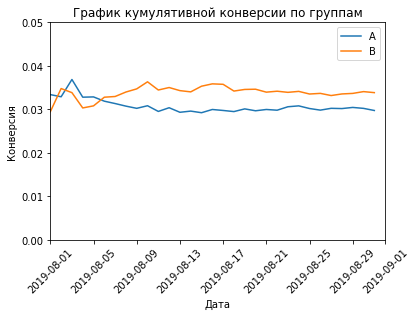

In [20]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']


# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation = 45)
plt.title("График кумулятивной конверсии по группам")
plt.xlabel("Дата")
plt.ylabel("Конверсия")
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])

<div class="alert alert-info">
<b>Комментарий:</b><br>
Конверсия группы B в первые дни выбилась вперед и зафиксировалась.
</div>

### Построение графика относительного изменения кумулятивной конверсии группы B к группе A.

(18109.0, 18140.0, -0.3, 0.6)

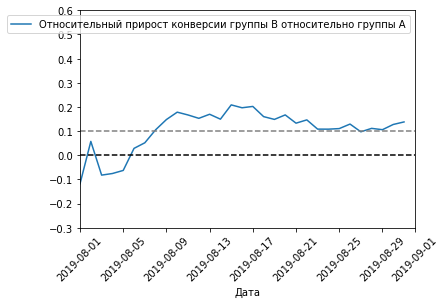

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xticks(rotation = 45)
plt.xlabel("Дата")
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.3, 0.6])

<div class="alert alert-info">
<b>Комментарий:</b><br>
Конверсия группы B в первые дни проигрывала, но выбилась вверх и, в целом, дердится на уровне.
</div>

### Построение точечного графика количества заказов по пользователям.

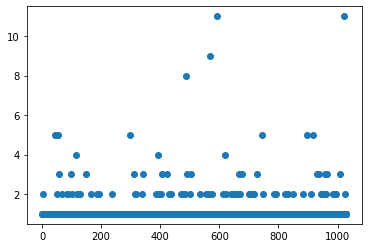

In [22]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 

<div class="alert alert-info">
<b>Комментарий:</b><br>
В основном клиенты делают до 2х заказов. 
</div>

### Подсчёт 95-го и 99-го перцентиля количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

In [23]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))
need_orders = np.percentile(ordersByUsers['orders'], [95, 99])[1]

[2. 4.]


<div class="alert alert-info">
<b>Комментарий:</b><br>
Не более 5 процентов пользователей делают более 2-х заказов.<br>
Границей возьмем пользователей с количетсвом заказов до 2-х включительно.
</div>

### Построение точечного графика стоимостей заказов.

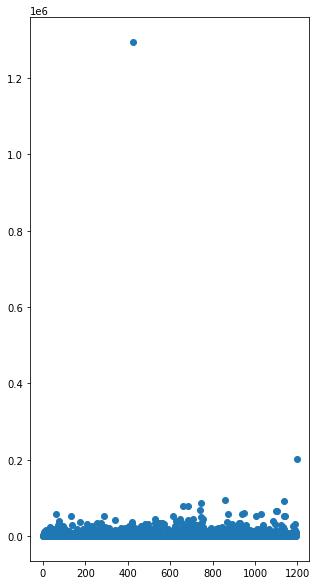

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(5, 10))
plt.scatter(x_values, orders['revenue']) 

<div class="alert alert-info">
<b>Комментарий:</b><br>
На графике видно лишь 2 сильно выбивающихся заказа по своей стоимости.
</div>

(500.0, 1000.0)

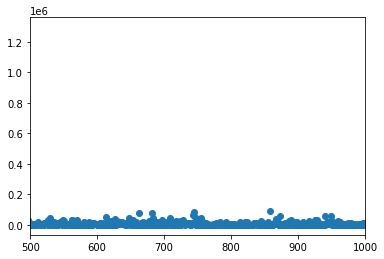

In [25]:
plt.scatter(x_values, orders['revenue']) 
plt.xlim([500, 1000])

### Подсчёт 95-го и 99-го перцентиля стоимости заказов. Выбор границы для определения аномальных заказов.

In [26]:
print(np.percentile(orders['revenue'], [95, 99]))
need_revenue = np.percentile(orders['revenue'], [95, 99])[1]

[28000.  58233.2]


<div class="alert alert-info">
<b>Комментарий:</b><br>
Отбросим 1% пользователей, чья стоимость заказов сильно превышает стоимость остальных покупателей (дороже 54к)
</div>

### Подсчёт статистической значимости различий в конверсии между группами по «сырым» данным

In [27]:
# Подготовка данных

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

* `date` — дата;
* `ordersPerDateA` — количество заказов в выбранную дату в группе A;
* `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
* `ordersPerDateB` — количество заказов в выбранную дату в группе B;
* `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
* `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
* `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
* `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
* `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
* `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
* `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
* `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
* `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

<div class="alert alert-info">
<b>Комментарий:</b><br>
Сформулируем гипотезы.<br>
Нулевая: различий в конверсии между группами нет. <br>
Альтернативная: различия в конверсии между группами есть.
</div>

In [28]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

alpha = 0.05
pvalue = stats.mannwhitneyu(sampleA, sampleB)[1]

print("{0:.3f}".format(pvalue))
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть гипотезу')

print()
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


0.017
Отвергаем нулевую гипотезу

0.138


<div class="alert alert-info">
<b>Комментарий:</b><br>
Вывод: По «сырым» данным различий в конверсии групп A и B есть.
Нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем, т.к p-value (0,017) < 0.05<br> 
Однако относительная победа группы B равна 13.8% — второе число в выводе.
</div>

### Подсчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

<div class="alert alert-info">
<b>Комментарий:</b><br>
Нулевая гипотеза: различий в среднем чеке между группами нет.<br>
Альтернативная гипотеза: различия в среднем чеке между группами есть.
</div>

In [29]:
alpha = 0.05
pvalue = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

print('{0:.3f}'.format(pvalue))
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть гипотезу')

print()
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
Не можем отвергнуть гипотезу

0.259


<div class="alert alert-info">
<b>Комментарий:</b><br>
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.<br>
Впрочем, средний чек группы B значительно выше среднего чека группы A.
</div>

<div class="alert alert-info">
<b>Комментарий V2:</b><br>
Прирост в 26% может быть обусловлен аномалиями. К тому же присутствует в группе В один очень крупный заказ.
</div>

### Подсчёт статистической значимости различий в конверсии между группами по «очищенным» данным

In [30]:
# Примем за аномальных пользователей тех, кто совершил больше 2 заказов или совершил заказ дороже 58 000 рублей.

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > need_orders]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > need_orders]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > need_revenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.shape[0])

15


In [31]:
# Всего 31 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста

# Подготовка выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.014
0.153


<div class="alert alert-info">
<b>Комментарий:</b><br>
Результаты по конверсии практически не изменились.
</div>

### Подсчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

In [32]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.851
-0.006


<div class="alert alert-info">
<b>Комментарий:</b><br>
P-value немного уменьшился, разница между сегментами изменилась на 28% (с 26% до -2%) и ушла в отрицательную сторону.
</div>

### Принятие решения по результатам теста

<div class="alert alert-info">
<b>Комментарий V2:</b><br>
Имеющиеся факты:
Есть статистически значимые различия по конверсии между группами по «сырым» и по данным после фильтрации аномалий;<br>
Нет статистически значимых различия по среднему чеку между группами по «сырым» и по данным после фильтрации аномалий, однако изменился прирост;<br>
График различия конверсии между группами сообщает, что результаты группы B лучше группы A.<br><br>
    
В следствии того, что удалось отвергнуть одну из гипотез в пользу группы В, предлагаю остановить тест.    
</div>